### House Prices Analysis Prediction


In this project, I am a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. I am tasked with determining the market price of a house given a set of features. I will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on

<center><img src="https://cdn.decoist.com/wp-content/uploads/2021/06/Two-story-black-house-witg-glass-walls-in-the-middle-of-the-forest-19247.jpg"></center>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
from ipywidgets import interact,interactive,fixed,interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import requests

# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It contains the following columns.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


<h2>Importing Dataset:<h2>

In [2]:
housing_df = pd.read_csv("../input/housesalesprediction/kc_house_data.csv")
df = housing_df

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Data Wrangling

In [4]:
missing_data = df.isnull()
missing_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
id
False    21613
Name: count, dtype: int64

date
date
False    21613
Name: count, dtype: int64

price
price
False    21613
Name: count, dtype: int64

bedrooms
bedrooms
False    21613
Name: count, dtype: int64

bathrooms
bathrooms
False    21613
Name: count, dtype: int64

sqft_living
sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64

floors
floors
False    21613
Name: count, dtype: int64

waterfront
waterfront
False    21613
Name: count, dtype: int64

view
view
False    21613
Name: count, dtype: int64

condition
condition
False    21613
Name: count, dtype: int64

grade
grade
False    21613
Name: count, dtype: int64

sqft_above
sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64

yr_built
yr_built
False    21613
Name: count, dtype: int64

yr_renovated
yr_renovated
False    21613
Name: count, dtype: int64

zipcode
zipcode
False    21613
Name: count, dtyp

As you can see, there is no missing data in the dataset.

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Based on the data types provided, a few adjustments might be necessary:

* date: Should be converted to a datetime type.
* zipcode: Could be treated as a categorical variable rather than a numerical one, depending on the context of your analysis.

In [7]:
# Converting 'date' to datetime

df['date'] = pd.to_datetime(df['date'])



In [8]:
# Replacing zeros with NaN in the sqft_basement column

df['sqft_basement'] = df['sqft_basement'].replace(0, np.nan)

# filling  NaN values 

df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())

In [9]:
# Replacing zeros with NaN in the yr_renovated column 

df['yr_renovated '] = df['yr_renovated'].replace(0, np.nan)

# filling NaN values

df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

In [10]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,700.0,1955,0,98178,47.5112,-122.257,1340,5650,NaN
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,1991.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,700.0,1933,0,98028,47.7379,-122.233,2720,8062,NaN
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,NaN
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,700.0,1987,0,98074,47.6168,-122.045,1800,7503,NaN
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930,NaN
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,700.0,1995,0,98003,47.3097,-122.327,2238,6819,NaN
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,700.0,1963,0,98198,47.4095,-122.315,1650,9711,NaN
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730.0,1960,0,98146,47.5123,-122.337,1780,8113,NaN
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,700.0,2003,0,98038,47.3684,-122.031,2390,7570,NaN


# Exploratory Data Analysis

<h2>Feature Engineering:<h2>

In [11]:
# One-hot encode categorical variables
df = pd.get_dummies(df)


scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<h2>Continuous Numerical Variables:<h2>

Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines,line plots, histograms, violin plots, density plots, area plots , heat maps, contour plots, hexbin plots, pair plots, bubble plots.

In order to start understanding the (linear) relationship between an individual variable and the price,I used "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well.

Below are some of the continuous variables I found:
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* lat
* long

In [12]:
# List of columns to consider
columns_to_consider = ["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]

# Select only the columns of interest and ensure they are numeric
df_selected = df[columns_to_consider].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Extract the correlations with respect to 'price'
price_correlation = corr_matrix['price'].sort_values(ascending=False)

print(price_correlation)

price            1.000000
sqft_living      0.702035
sqft_above       0.605567
sqft_living15    0.585379
sqft_basement    0.320784
lat              0.307003
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
long             0.021626
Name: price, dtype: float64


As you can see above, only sqft_living and sqft_above have a strong positive linear correlation to price. Below are the visualizations using a regression plot:

* Implementing the regresssion plot for "sqft_living" with respect to prices

(0.0, 20.548936497984883)

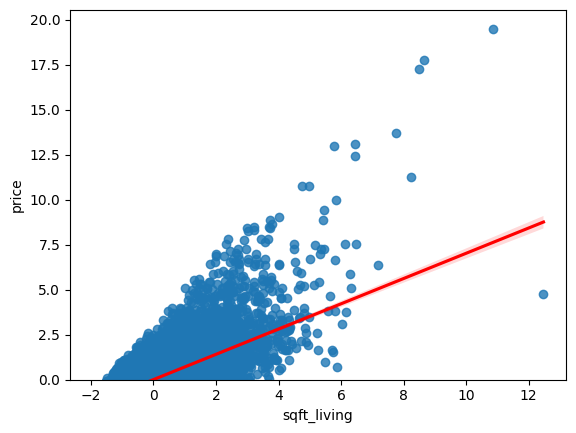

In [13]:
sns.regplot(x = "sqft_living", y = "price", data = df, line_kws = {"color" : "red"})
plt.ylim(0)

The square footage of the home appears to be a good predictor of price, as the scatter plot points are closely aligned with the regression line, indicating a positive linear correlation."

I can verify my findings below:

In [14]:
df[["sqft_living", "price"]].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


* Implementing the regresssion plot for "sqft_above" with respect to prices

(0.0, 20.541480978450217)

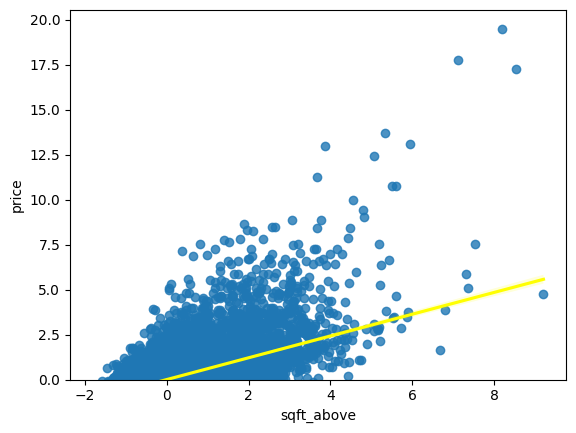

In [15]:
sns.regplot(x = "sqft_above", y = "price", data = df, line_kws = {"color" : "yellow"})
plt.ylim(0)

The square footage of the house apart from the basement appears to be a good predictor of price, as the scatter plot points are closely aligned with the regression line, indicating a positive linear correlation."

I can verify my findings below:

In [16]:
df[["sqft_above", "price"]].corr()

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


<h2>Categorical Variables<h2>

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Below are some of the categorical variables I found:

* bedrooms
* bathrooms
* floors
* waterfront
* view
* grade

In [17]:

 df[["price", "bedrooms", "bathrooms", "floors", "waterfront", "view", "grade"]].corr()



,price,bedrooms,bathrooms,floors,waterfront,view,grade
price,1.000000,0.308350,0.525138,0.256794,0.266369,0.397293,0.667434
bedrooms,0.308350,1.000000,0.515884,0.175429,-0.006582,0.079532,0.356967
bathrooms,0.525138,0.515884,1.000000,0.500653,0.063744,0.187737,0.664983
floors,0.256794,0.175429,0.500653,1.000000,0.023698,0.029444,0.458183
waterfront,0.266369,-0.006582,0.063744,0.023698,1.000000,0.401857,0.082775
view,0.397293,0.079532,0.187737,0.029444,0.401857,1.000000,0.251321
grade,0.667434,0.356967,0.664983,0.458183,0.082775,0.251321,1.000000


As you can see from the findings above, only  "bathrooms" and "grade" have a moderate to strong positive linear correlation to price. I ilustrate my findings below using boxplots;

* Implementing the box plot for "bathrooms" with respect to prices

<Axes: xlabel='bathrooms', ylabel='price'>

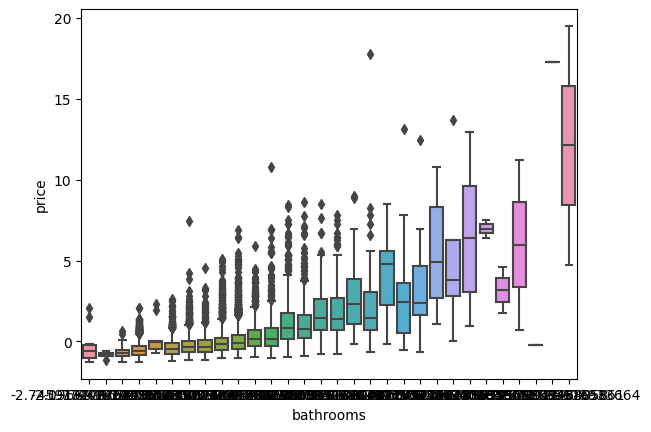

In [18]:
sns.boxplot(x = "bathrooms", y =  "price", data = df)

Here we see that the distribution of prices between various bathroom numbers in the home are distinct enough to take bathrooms as a potential good predictor of price.

I verify my findings below:

In [19]:
df[["bathrooms", "price"]].corr()

,bathrooms,price
bathrooms,1.000000,0.525138
price,0.525138,1.000000


* Implementing the box plot for "grade" with respect to prices

<Axes: xlabel='grade', ylabel='price'>

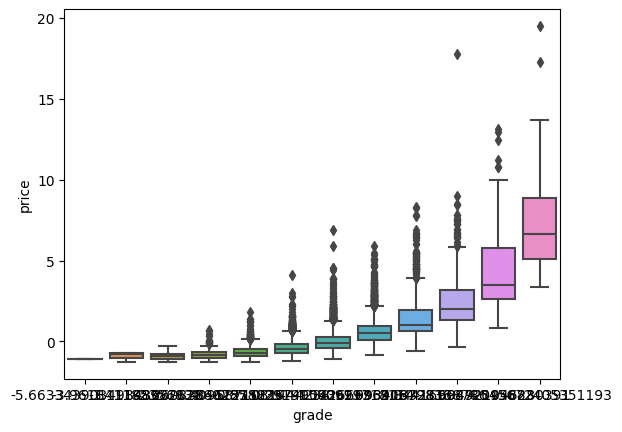

In [20]:
sns.boxplot(x = "grade", y =  "price", data = df)

Here we see that the distribution of prices between the various gardes given to each respective houses are distinct enough to take grade as a potential good predictor of price.

I verify my findings below:

In [21]:
df[["grade", "price"]].corr()

,grade,price
grade,1.000000,0.667434
price,0.667434,1.000000


<h2>EDA Conclusion:<h2>

From my analysis, i now a better idea of which variables to consider doing my Model Development phase, and they are as follows:

* sqft_living (Square footage of the home)

* sqft_living15 (square footage of the home for the year 2015)

* sqft_above (Square footage of house apart from basement)

* bathrooms (Number of bathrooms)

* grade (overall grade given to the housing unit, based on King County grading system)

# Model Development

<h2>Model 1<h2>

My first model will be Simple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)

I fit a linear regression model that may be used to predict the price by using the sqft_living attribute of the dataset.

In [22]:
lm = LinearRegression()

In [23]:
x = df[['sqft_living']]
y = df['price']

In [24]:
lm.fit(x,y)

LinearRegression()

In [25]:
# obatining a prediction
Yhat = lm.predict(x)
Yhat[0:5]

array([-0.68787853,  0.37463001, -1.00128033, -0.09165072, -0.30568121])

In [26]:
print("The R^2 value is:", lm.score(x,y))

The R^2 value is: 0.4928532179037931


We can say that ~49.285% of the variation of the price is explained by this simple linear model "sqft_living".

**calculating the MSE for simple linear regression:**

In [27]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of the price and predicted value is:',mse)

The mean square error of the price and predicted value is: 0.5071467820962069


**Visualizing my linear model between sqft_living and price:**


<Axes: xlabel='sqft_living', ylabel='price'>

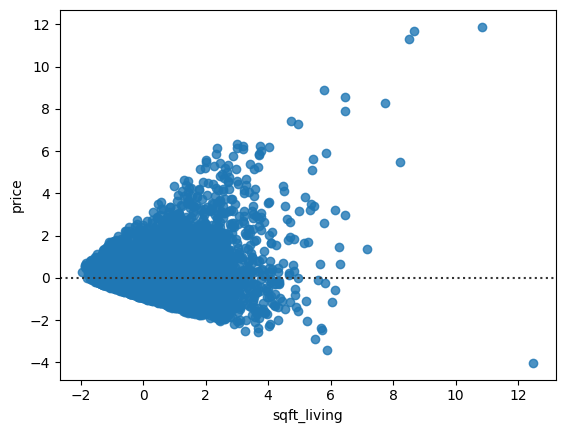

In [28]:
sns.residplot(x = df['sqft_living'], y = df['price'])

Here i see that that the points are not randomly spread out, making me come to the conclusion that a linear model is not appropriate for the data.

<h2>Model 2:<h2>

My second model will be Multiple Linear Regression

What if I want to predict the price of a house using more than one variable?

If I want to use more variables in my model to predict the house prices, I can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

In [29]:
z =df[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]]

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(z, df['price'])

LinearRegression()

In [32]:
Yhat2 = lm.predict(z)
Yhat2[0:5]

array([-0.76146122,  0.42771954, -0.56258213, -0.21469297, -0.18853104])

In [33]:
print('The R^2 value is:', lm.score(z,df['price']))

The R^2 value is: 0.6772667882767119


We can say that ~67.726 % of the variation of price is explained by this multiple linear regression "multi_fit"

**calculating the MSE for multiple linear regression:**

In [34]:
# calculating the MSE for the MLR

Y_predict_multifit = lm.predict(z)
print('The mean square error of charge predicted value using multifit is:',\
     mean_squared_error(df['price'],Y_predict_multifit))

The mean square error of charge predicted value using multifit is: 0.32273321172328806


**Visualizing my  multiple linear model between Actual values and predicted values:**

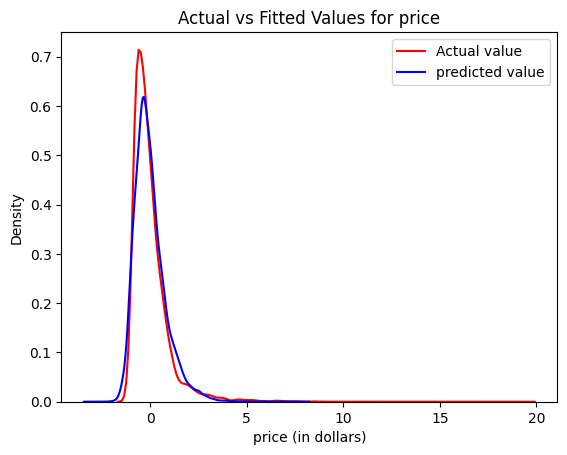

In [35]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for price')
plt.xlabel('price (in dollars)')
plt.ylabel('Density')
plt.legend(['Actual value', 'predicted value'])

plt.show()
plt.close()

The fitted values exhibit a reasonable approximation to the actual values, as indicated by the partial overlap between their distributions. However, the presence of discrepancies suggests that the model could benefit from further refinement

<h2>Model 3<h2>

My third model will be a Polynomial Regression

In [36]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [37]:
Pipe = Pipeline(Input)
Pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
z = z.astype(float)
Pipe.fit(z,y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
yPipe = Pipe.predict(z)
yPipe[0:5]

array([-0.60091288,  0.05369781, -0.13998846, -0.41890906, -0.14308377])

In [40]:
print(r2_score(y, yPipe))

0.7804159234898016


We can say that ~78.041 % of the variation of price is explained by this polynomial fit

**calculating the MSE for polynomial fit:**

In [41]:
mean_squared_error(df['price'],yPipe)

0.21958407651019843

# Model Evaluation and Refinement

I split the data into training and testing sets:

In [42]:
z =["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]    
X = df[z]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [43]:
lre = LinearRegression()

In [44]:
lre.fit(x_train[['sqft_living']],y_train)

LinearRegression()

**calculating the R^2 on the test data**

In [45]:
lre.score(x_test[['sqft_living']], y_test)

0.4910058627910613

**calculating the R^2 of the training data**

In [46]:
lre.score(x_train[['sqft_living']],y_train)

0.49319214625811036

creating functions to be used 


In [47]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    axl = sns.kdeplot(RedFunction, color = "r", label = RedName)
    ax2 = sns.kdeplot(BlueFunction, color = "b", label = BlueName, ax = axl)
    plt.title(Title)
    plt.xlabel('price(in dollars)')
    plt.ylabel('proportions of houses')
    plt.show()
    plt.close()

In [48]:
def PollyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    # Define the range for the plot
    xmax = max([x_train.max(), x_test.max()])
    xmin = min([x_train.min(), x_test.min()])
    x = np.arange(xmin, xmax, 0.1).reshape(-1, 1)
    
    # Plot training and test data
    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    # Plot the predicted function
    plt.plot(x, lr.predict(poly_transform.transform(x)), label='Predicted Function')
    
    plt.ylim([y_train.min() - 10000, y_train.max() + 10000])
    plt.ylabel('Price')
    plt.legend()
    plt.show()


# Cross-validation_score

In [49]:
Rcross  = cross_val_score(lre, X[['sqft_living']],Y, cv = 4)
Rcross

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

In [50]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is ", Rcross.std())

The mean of the folds are 0.4921577814175951 and the standard deviation is  0.0048161648143741605


# model selection

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(x_train[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]],y_train)

LinearRegression()

In [53]:
yhat_train = lr.predict(x_train[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]])
yhat_train[0:5]

array([-0.48562935, -0.32529526, -0.88311744,  0.53229186, -0.03204404])

In [54]:
yhat_test = lr.predict(x_test[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]])
yhat_test

array([ 0.30354444, -0.30623658,  0.53900671, ...,  0.29443992,
        0.2190775 , -0.62977103])

**Examining the distribution pf the predicted values of the training data**

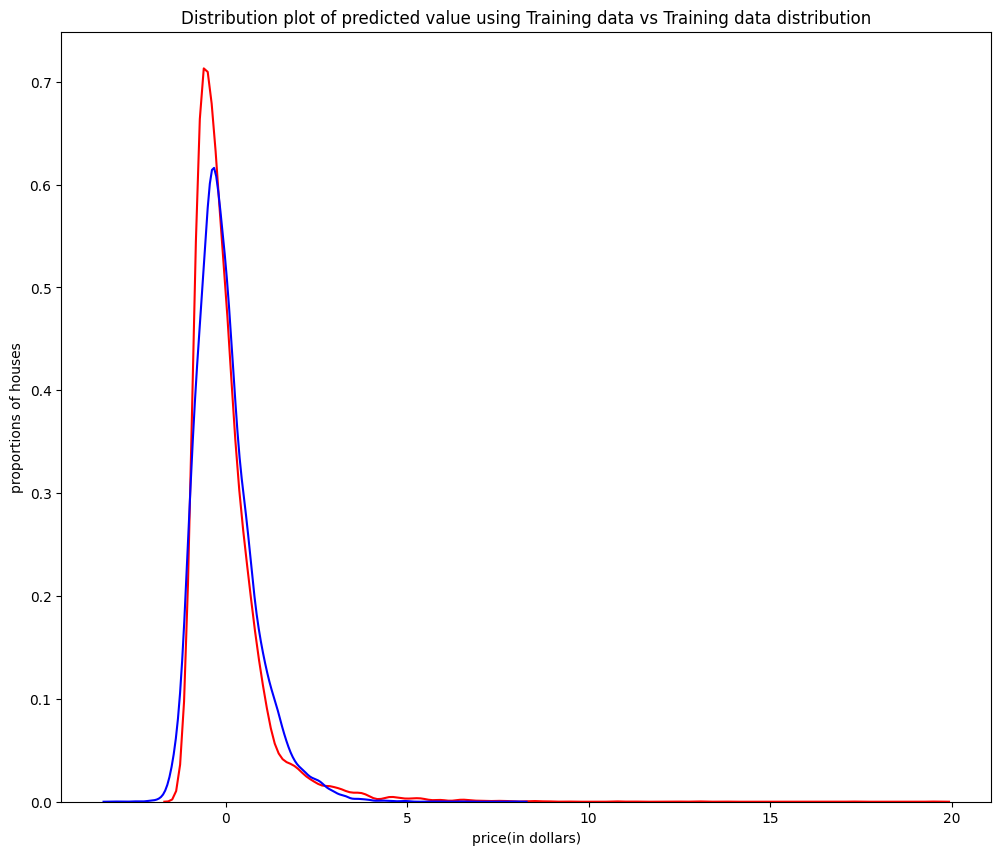

In [55]:
Title  = 'Distribution plot of predicted value using Training data vs Training data distribution'
DistributionPlot(y_train, yhat_train, "Actual values(Train)", "Predicted values(Train)", Title)

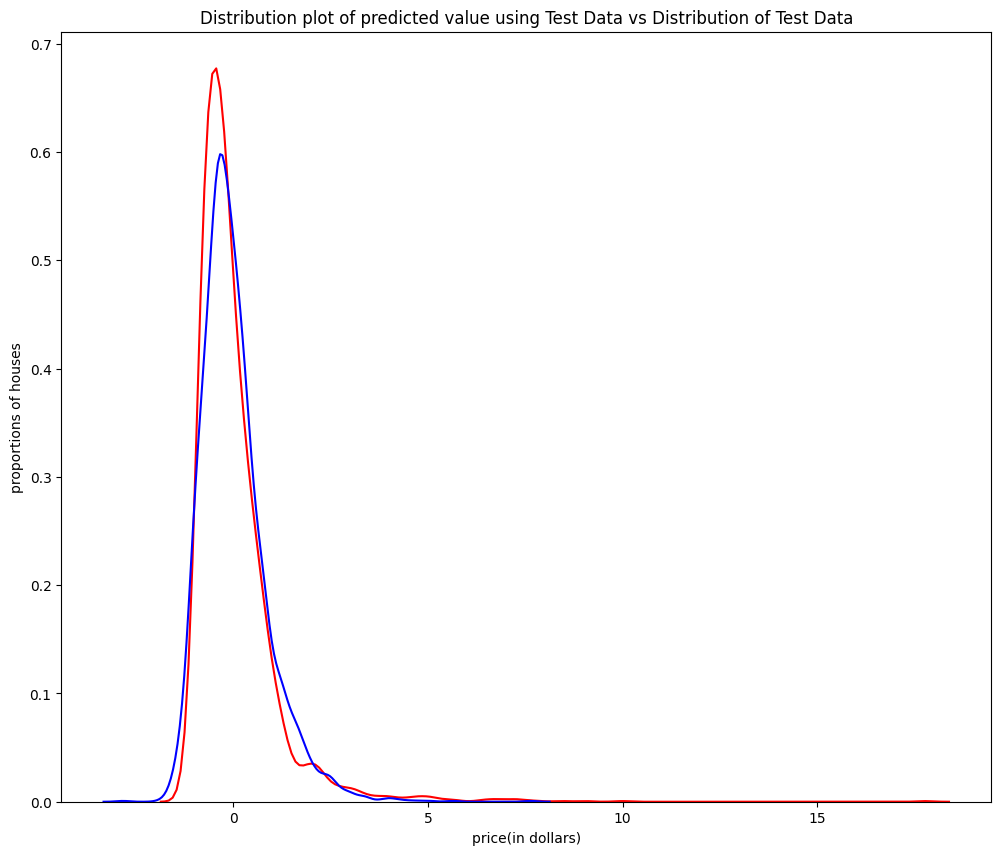

In [56]:
Title = 'Distribution plot of predicted value using Test Data vs Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual values(Test)", "predicted values(Test)", Title)

**Now i decide to use 55% of my data for training, to determine the overfitting**


In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.45, random_state = 0)

In [58]:
Pr = PolynomialFeatures(degree = 5)
x_train_Pr = Pr.fit_transform(x_train[['sqft_living']])
x_test_Pr = Pr.fit_transform(x_test[['sqft_living']])
Pr

PolynomialFeatures(degree=5)

In [59]:
poly = LinearRegression()
poly.fit(x_train_Pr, y_train)

LinearRegression()

In [60]:
yhat = poly.predict(x_test_Pr)
yhat[0:5]

array([-0.43489967,  2.36735484, -0.43079159, -0.54647276,  0.70304987])

In [61]:
print("predicted values:", yhat[0:4])
print("True values:",y_test[0:4])

predicted values: [-0.43489967  2.36735484 -0.43079159 -0.54647276]
True values: 17384   -0.662151
722      2.827183
2680     0.059958
18754    0.248998
Name: price, dtype: float64


**To identify the point of overfitting in the model on the parameter "sqft_living":**

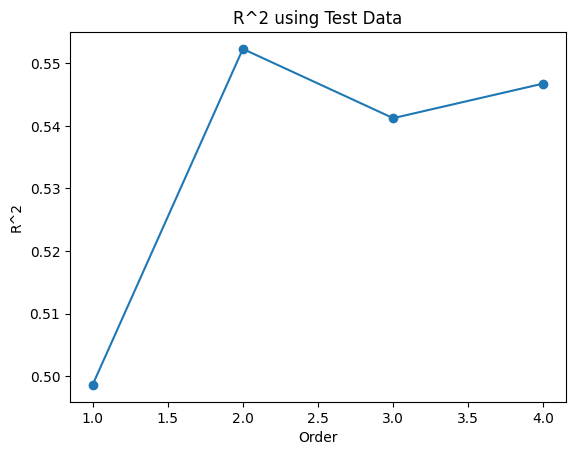

In [62]:
# List to store R^2 values for test data
Rsqu_test = []

# Polynomial degrees to test
order = [1, 2, 3, 4]

# Loop through different polynomial degrees
for n in order:
    Pr = PolynomialFeatures(degree=n)
    x_train_pr = Pr.fit_transform(x_train[['sqft_living']])
    x_test_pr = Pr.fit_transform(x_test[['sqft_living']])
    
    lr = LinearRegression()
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

# Plotting the results
plt.plot(order, Rsqu_test, marker='o')
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 using Test Data')
plt.show()

In [63]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = test_data, random_state = 0)
    Pr = PolynomialFeatures(degree = order)
    x_train_pr = Pr.fit_transform(x_train[['sqft_living']])
    x_test_pr = Pr.fit_transform(x_test[['sqft_living']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train['sqft_living'], x_test['sqft_living'], y_train, y_test, poly, Pr)
    

# Model Refinement

In [64]:
Pr = PolynomialFeatures(degree =2)

In [65]:
X_train_pr = Pr.fit_transform(x_train[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]])
X_test_pr = Pr.fit_transform(x_test[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]])

<h2>Feature Scaling:<h2>

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2>Regularization Parameter:<h2>

In [67]:
alpha = 1.0  # You can experiment with different values
model = Ridge(alpha=alpha)
model.fit(X_scaled, y)

Ridge()

<h3>Checking for Multicollinearity:<h2>

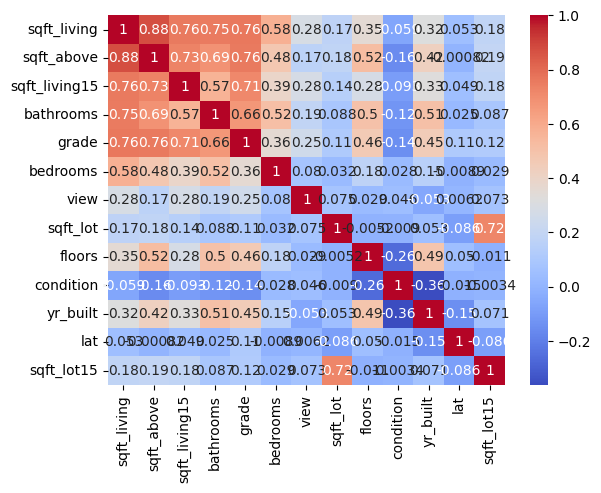

In [68]:
# Assuming X is a DataFrame
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [69]:
RigeModel = Ridge(alpha = 0.1)
RigeModel.fit(X_train_pr, y_train)


Ridge(alpha=0.1)

In [70]:
yhat = RigeModel.predict(X_test_pr)

In [71]:
print('predicted:', yhat[0:4])

predicted: [-0.42724476  3.25495199 -0.08035813  0.07346778]


In [72]:
print('test set:', y_test[0:4].values)

test set: [-0.66215134  2.82718328  0.05995842  0.2489981 ]


In [73]:
print(r2_score(y_test, yhat))

0.7668955027409314


# Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [74]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [75]:
RR=Ridge()
RR

Ridge()

In [76]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [77]:
Grid1.fit(X[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]], Y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [78]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=100)

I now test my model on the test data:

In [79]:
BestRR.score(x_test[["sqft_living", "sqft_above", "sqft_living15", "bathrooms", "grade", "bedrooms", "view", "sqft_lot", "floors", "condition", "yr_built", "lat", "sqft_lot15"]], y_test)

0.6722275232638615

# Conclusion

In this analysis, I meticulously handled data preprocessing, including missing value treatment and outlier removal. Feature engineering was enhanced by encoding categorical variables and normalizing numerical features. I explored multiple models and  ensured thorough hyperparameter tuning and validation to avoid overfitting. 

My evaluation metrics included RMSE, MAE, and R², complemented by visual performance diagnostics. The polynomial plot, optimized through hyperparameter tuning, emerged as the best performer, offering superior predictive accuracy. Meanwhile, the Feature Importance Plot secured second place.

Moving forward, I recommend that :
* The machine learning and AI algorith engineers dive deeper into feature engineering, utilizing advanced ensemble methods, and considering deployment strategies for practical implementation.

**All Glory Be To The Lord Almighty!**